In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook

from synthacc.source.moment import mw_to_m0, m0_to_mw
from synthacc.source.rupture.slip import CompositeSourceSDC, CompositeSourceSDG

from faults import rauw_simple_fault

In [2]:
segment = rauw_simple_fault()
magnitude = 6.5

c = CompositeSourceSDC(100, rminf=10, rmaxf=0.5)
g = CompositeSourceSDG(c, segment.width, segment.length, magnitude)

In [3]:
print(mw_to_m0(magnitude)/(segment.width**2 * segment.length))
print(mw_to_m0(magnitude) * (7/16) / np.sqrt(segment.width*segment.length/np.pi)**3)

155419.89206917578
275154.63720322365


1.836466273110041


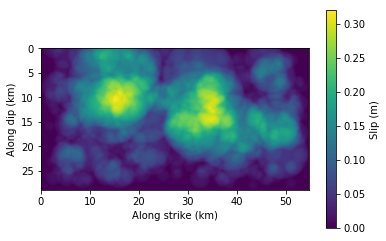

In [4]:
sd = g()
print(m0_to_mw(sd.avg*sd.area*segment.rigidity))
sd.plot()

0.5673132296883376 0.0 2.001271796406023


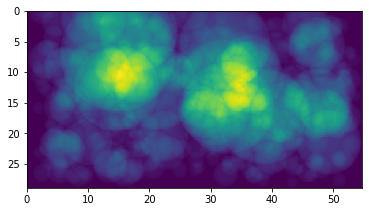

In [5]:
stress = (7/16) * np.pi * segment.rigidity * sd.values / np.sqrt(sd.cell_area / np.pi)

print(stress.mean(), stress.min(), stress.max())

fig, ax = plt.subplots()
extent = [0, sd.l/1000, sd.w/1000, 0]
ax.imshow(stress, extent=extent)
plt.show()

In [6]:
n = 10

avgs = np.zeros(n)
maxs = np.zeros(n)
stds = np.zeros(n)

for i in tqdm_notebook(range(n)):
    sd = g()
    avgs[i] = sd.avg
    maxs[i] = sd.max
    stds[i] = sd.values.std()

In [7]:
print(avgs.mean(), maxs.mean())

0.12860084927129867 0.4403168985109184


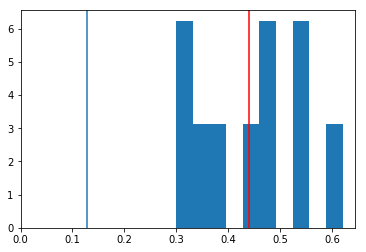

In [8]:
plt.hist(maxs, density=True)
plt.axvline(avgs.mean())
plt.axvline(maxs.mean(), c='r')
plt.xlim(0)
plt.show()

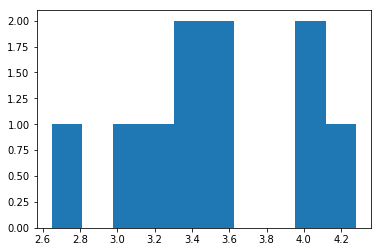

In [9]:
ratios = maxs / avgs
plt.hist(ratios)
plt.show()